# <font color='dark green'>Logistic Regression</font>

* A dataset with one or more independent variables is used to <b>determine the binary output</b> (0 or 1) of the dependent variable.
* It helps to calculate the <b>possibility or probability</b> of a particular event taking place.
* It is an <b>s-curve</b> (s = sigmoid).

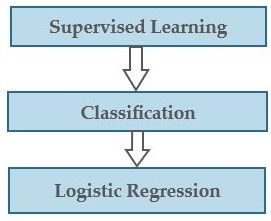

<br>

### <font color='green'>Example for Logistic Regression</font>

* Consider your car is not serviced for quite a few years.
* To determine whether your car will breakdown or not in the future.

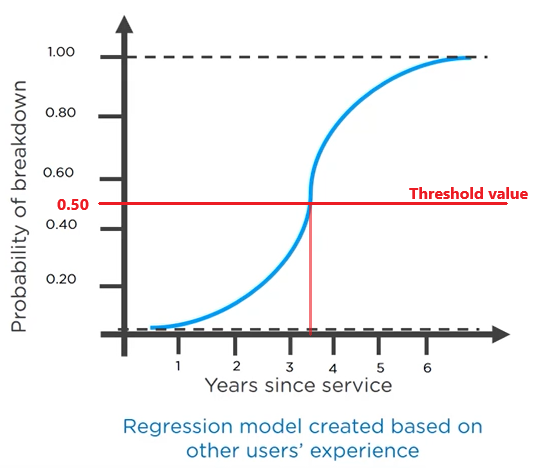
<br>
* Here, the <b>Threshold value is 0.50</b>, indicates that the car is more likely to breakdown after 3.5 years of usage.
* <b>Probability > 0.50</b> value rounded off to 1 → The car will <b>breakdown</b>.
* <b>Probability < 0.50</b> value rounded off to 0 → The car will <b>not breakdown</b>.

<br>

### <font color='green'>Logistic Regression equation</font>

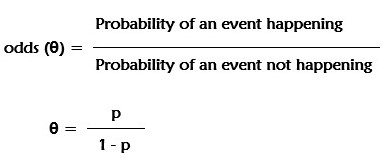

* The values of <b>odds</b> range from <b>0 to ∞</b>.
* The values of <b>probability</b> change from <b>0 to 1</b>.

<br>

### <font color='green'>Applications of Logistic Regression</font>

<b><font color='sky blue'>1) Weather prediction</font></b>
* Weather prediction can be done in both Linear regression and Logistic regression.
* In Logistic regression - it helps to determine the kind of weather that can be expected (whether it will rain or not).
* In Linear regression - it can predict what is going to be the temperature tomorrow.
 

<b><font color='sky blue'>2) Image categorization</font></b>
* Identifies the different components that are present in the image and helps to categorize them.

<b><font color='sky blue'>3) Healthcare</font></b>
* Determines the possibility of patient survival (taking age, ISS (Injury Severity Score) and RTS (Revised Trauma Score) into consideration).

<br>

### <font color='crimson'>Sample Project for Logistic Regression</font>

* Predicting the number in an image (8x8).

In [2]:
#Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [3]:
#To load the digits

digits = load_digits()

In [8]:
#Determining the total number of images and labels

print("Image Data Shape", digits.images.shape) #the images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.
print("Label Data Shape", digits.target.shape) #the target array, which gives the previously determined label for each digit. 

Image Data Shape (1797, 8, 8)
Label Data Shape (1797,)


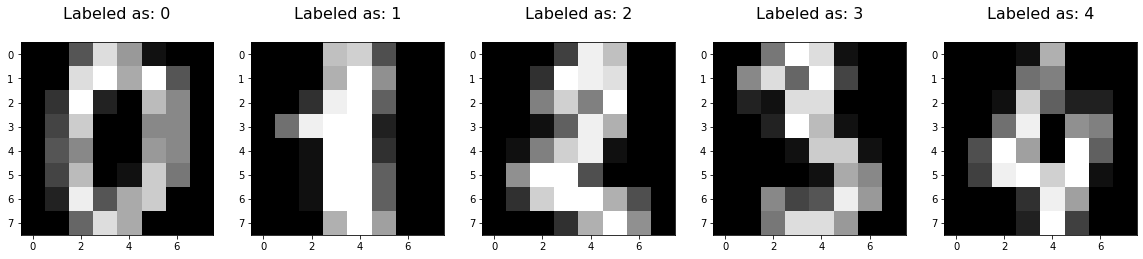

In [23]:
#Displaying some of the images and labels

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1) #the images should be displayed in 1 row, 5 coulmns, 5 plots (A plot is a graphical technique for representing a data set, usually as a graph showing the relationship between two or more variables.)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray) #The Diverging colormaps mostly vary from darker gray on the outer edges to white in the middle.
    plt.title("Labeled as: %i\n" %label, fontsize=16) #the actual title text string of the visualization depicted.

In [25]:
#Dividing dataset into Training and Test set

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

#test_size = 0.23 means 23% data is used for testing, remaining 77% data is used for training
#random_state=2 , every time you run the code you'll get the same result but probably with different values than before. 
#random_state=None (the default) , each time random seed is chosen and you'll get different results.

In [28]:
# total data = 1797, 77% of data for train = 1383, 23% of data for test = 414 (1383+414=1797)
print(x_train.shape)
print(x_test.shape)

(1383, 64)
(414, 64)


In [30]:
#Making an instance of the model and training it

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
#Predicting the Test set results

predictions = logisticRegr.predict(x_test)
print(predictions)

[4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 1 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 1 5 7 8 8 9 6 1 7 0 1 9 7 3 3 1 8 8 8 9 8 5 1 4 8 7 5 8 4 3 9 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 6 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 1 5 0 3 9 2 7 7 2 0 8 1 9 2 1 5 1 0 3 4 3 0 8 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 8 3 1 1 9 5 4 9 7 4 8 9 5 7 6 9 0 0 4 0 0 9 0 6 5 8 8
 3 7 8 2 0 8 2 7 3 0 2 1 5 2 7 0 6 9 3 3 1 3 5 2 8 5 2 1 2 9 4 6 5 5 5 9 7
 1 5 7 6 3 7 1 7 5 1 7 2 7 5 5 4 8 6 6 2 8 7 3 7 8 0 3 5 7 4 3 4 1 0 3 3 5
 4 1 3 1 2 5 1 4 0 3 1 5 5 7 4 0 1 0 8 5 5 5 4 0 1 8 6 2 1 1 1 7 9 6 7 9 7
 0 4 9 6 9 2 7 2 1 0 8 2 8 6 5 7 8 4 5 7 8 6 5 2 6 9 3 0 0 8 0 6 6 7 1 4 5
 6 9 7 2 8 5 1 2 4 1 8 8 7 6 0 8 0 6 5 5 7 8 0 4 1 4 5 9 2 2 3 9 1 3 9 3 2
 8 0 6 5 6 2 5 2 3 2 6 1 0 7 6 0 6 2 7 0 3 2 4 2 9 6 9 7 7 0 3 5 4 1 2 2 1
 2 7 7 0 4 9 8]


In [33]:
#Determining the accuracy of the model

score = logisticRegr.score(x_test, y_test)
print(score)

# That is, 94% Accuracy

0.9420289855072463


In [37]:
#Viewing the accuracy score in Confusion matrix

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  1  0  0  0  0  2  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  3  2  0]
 [ 0  2  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  2  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  1  3 28]]


Text(0.5, 1, 'Accuracy Score: 0.9420289855072463')

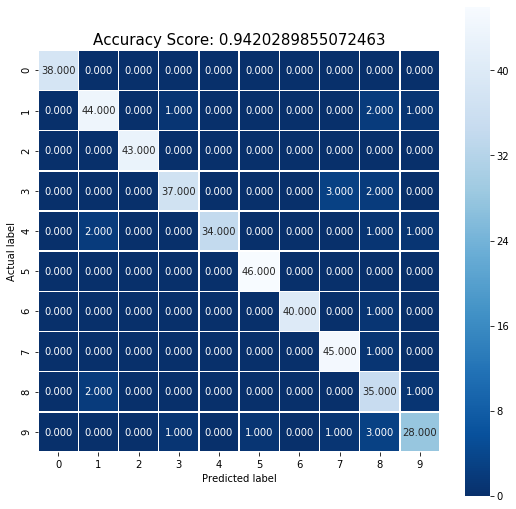

In [38]:
#Representing the confusion matrix in a heat map

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}' .format(score)
plt.title(all_sample_title, size=15)

<b><font color='sky blue'>Confusion matrix</font></b>
* It is used for identifying the accuracy of the classification model.
* The model will be most accurate when we have maximum number in its diagonal.
* The cells other than diagonals should have very minimum numbers.

<b>For example:</b>

* In the below image, 

→ 38 images of number 4 have been fed to the model.

→ out of that 34 images are predicted correctly and 4 images are predicted incorrectly.

→ 2 images are predicted as number 1.

→ 1 image is predicted as number 8.

→ 1 image is predicted as number 9.

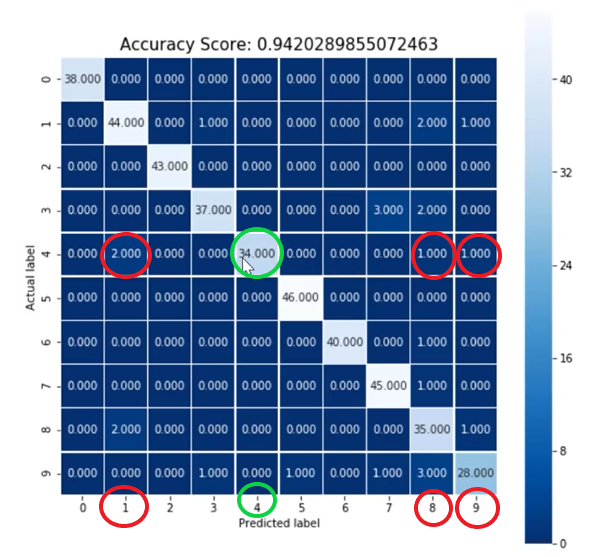

<br>
<br>
<br>
<br>
<br>
<b>Reference</b>

https://www.youtube.com/watch?v=XnOAdxOWXWg&list=PLEiEAq2VkUULNa6MHQAZSOBxzB6HHFXj4&index=2